<IPython.core.display.Javascript object>


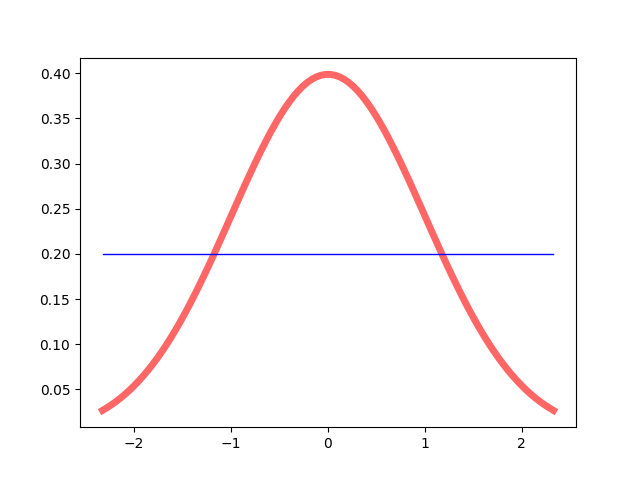

In [19]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [4]:
import pandas
import numpy as np

In [74]:
import pandas

fileIn="./data/TCL_wt1.tsv"
df = pandas.read_csv(fileIn, sep="\t", na_values='#VALEUR!', 
                     dtype = {'Accession'                       : str,
                              'Description'                     : str, 
                              'Gene Symbol'                     : str, 
                              'Corrected Abundance ratio (1.53)': np.float,
                              'Log2 Corrected Abundance Ratio' : np.float, 
                              '-LOG10 Adj.P-val': np.float,
                              'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)': np.float,
                             })
print(len(df))

2024


<IPython.core.display.Javascript object>


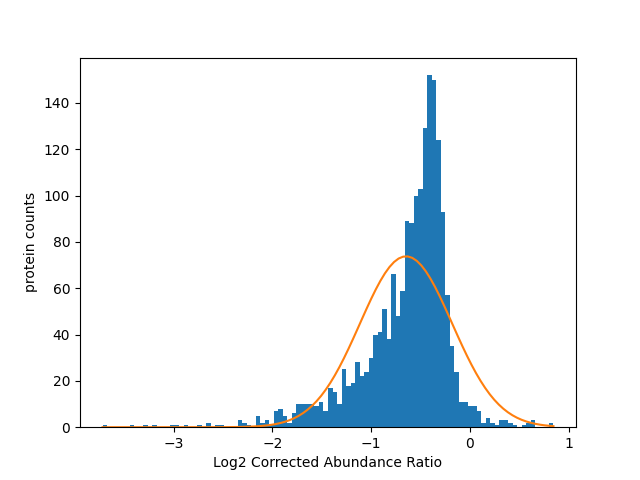

-0.6467130248461945 0.2183080071303949


In [35]:
from math import sqrt, pow


_ = df["Log2 Corrected Abundance Ratio"].dropna(how="any")
Log2_abundance_ratio = _.tolist()


fig, ax = plt.subplots()

hist = ax.hist(Log2_abundance_ratio, bins=100 )
mu = np.mean(Log2_abundance_ratio)
S_2 = (len(Log2_abundance_ratio) / (len(Log2_abundance_ratio) - 1) ) * pow(np.std(_), 2)
sigma=sqrt(S_2)
print(mu, S_2)

x = np.linspace(min(Log2_abundance_ratio), max(Log2_abundance_ratio), 100)
dx = hist[1][1] - hist[1][0]
scale = len(Log2_abundance_ratio)*dx
ax.plot(x, norm.pdf(x, mu, sigma)*scale)

ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel('protein counts')


fig.show()

In [53]:
df2 = df[ ['Accession', 'Log2 Corrected Abundance Ratio', '-LOG10 Adj.P-val'] ].dropna(how="any")
df2

,Accession,Log2 Corrected Abundance Ratio,-LOG10 Adj.P-val
0,P75936,-3.721335,4.260067
1,P76231,-3.429569,3.454627
2,P0A8S9,-3.284695,4.571899
4,P05706,-3.204277,1.699768
5,P29744,-3.009460,1.434787
...,...,...,...
2011,P77330,0.619129,0.507623
2016,P02930,0.634396,1.873757
2020,P0A917,0.659686,2.652391
2021,P02931,0.811390,4.164956


<IPython.core.display.Javascript object>


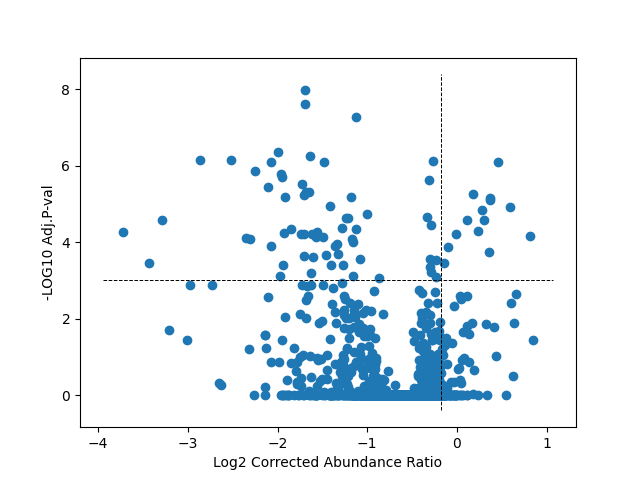

In [59]:
x_label, ylabel = df2.columns.values[1:]
# if native python parsing
x_values = df2['Log2 Corrected Abundance Ratio'].to_list()
y_values = df2['-LOG10 Adj.P-val'].to_list()
x_thresh =  mu + sigma
y_thresh  =  3 # 0.001

i_thresh = mu + sigma
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, marker='o')

ax.set_xlabel(x_label)
ax.set_ylabel(ylabel)
ax.plot(ax.get_xlim(), (y_thresh, y_thresh), color='black',linestyle="dashed", linewidth=0.7)
ax.plot((x_thresh, x_thresh), ax.get_ylim(), color='black',linestyle="dashed", linewidth=0.7)
fig.show()

In [75]:
df3=df2.loc[(df2['-LOG10 Adj.P-val'] > y_thresh )  & (df2['Log2 Corrected Abundance Ratio'] > x_thresh ) ]
df3

,Accession,Log2 Corrected Abundance Ratio,-LOG10 Adj.P-val
1862,P0A8V6,-0.149909,3.454627
1898,P0A9Q1,-0.102570,3.866640
1929,P02358,-0.013262,4.202292
1968,P0ACF8,0.115042,4.571899
1977,P62399,0.181404,5.258216
1979,P0A905,0.231256,4.291580
1982,P76506,0.279442,4.851298
1984,P13036,0.299501,4.571899
1989,P10384,0.360263,3.732993
1992,P06971,0.371240,5.156463


In [76]:
from xml.etree.ElementTree import parse, dump

def getAccessionGOTerms(xmlFile, accession):
    tree = parse(xmlFile)
    root = tree.getroot()
    ns = '{http://uniprot.org/uniprot}'
    
    match_go_terms = []
    proteins = root.findall(ns + 'entry')
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        current_accessions = [ acc.text for acc in accessions ]
        if not accession in current_accessions:
            continue
        goTerms = entry.findall('{http://uniprot.org/uniprot}dbReference[@type="GO"]')
        #goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
        for goT in goTerms:
            gID   = goT.attrib['id']
            gName = goT.find(ns +'property[@type="term"]').attrib['value']
            match_go_terms.append((gID, gName))
        break
    return match_go_terms
getAccessionGOTerms("./data/uniprot-proteome_UP000000625.xml", "P0A8V6")

[('GO:0005829', 'C:cytosol'),
 ('GO:0003677', 'F:DNA binding'),
 ('GO:0003700', 'F:DNA-binding transcription factor activity'),
 ('GO:0000062', 'F:fatty-acyl-CoA binding'),
 ('GO:0019395', 'P:fatty acid oxidation'),
 ('GO:0045892', 'P:negative regulation of transcription, DNA-templated'),
 ('GO:0045723', 'P:positive regulation of fatty acid biosynthetic process'),
 ('GO:0045893', 'P:positive regulation of transcription, DNA-templated'),
 ('GO:0019217', 'P:regulation of fatty acid metabolic process')]

In [78]:
abundant_proteins_go_terms = {}

for accession in df3["Accession"].to_list():
    found_go_terms = getAccessionGOTerms("./data/uniprot-proteome_UP000000625.xml", accession)
    for (GO_id, GO_name) in found_go_terms:
        if GO_id not in abundant_proteins_go_terms:
            abundant_proteins_go_terms[GO_id] = {
                "ID"    : GO_id,
                "name"  : GO_name,
                "carried_by" : []
            }
        abundant_proteins_go_terms[GO_id]['carried_by'].append(accession)
    print(accession)

abundant_proteins_go_terms

P0A8V6
P0A9Q1
P02358
P0ACF8
P62399
P0A905
P76506
P13036
P10384
P06971
P0A910
P06996
P76344
P02931


{'GO:0005829': {'ID': 'GO:0005829',
  'name': 'C:cytosol',
  'carried_by': ['P0A8V6', 'P0A9Q1', 'P02358', 'P0ACF8', 'P62399', 'P76344']},
 'GO:0003677': {'ID': 'GO:0003677',
  'name': 'F:DNA binding',
  'carried_by': ['P0A8V6', 'P0ACF8']},
 'GO:0003700': {'ID': 'GO:0003700',
  'name': 'F:DNA-binding transcription factor activity',
  'carried_by': ['P0A8V6', 'P0A9Q1']},
 'GO:0000062': {'ID': 'GO:0000062',
  'name': 'F:fatty-acyl-CoA binding',
  'carried_by': ['P0A8V6']},
 'GO:0019395': {'ID': 'GO:0019395',
  'name': 'P:fatty acid oxidation',
  'carried_by': ['P0A8V6']},
 'GO:0045892': {'ID': 'GO:0045892',
  'name': 'P:negative regulation of transcription, DNA-templated',
  'carried_by': ['P0A8V6', 'P0A9Q1', 'P0ACF8']},
 'GO:0045723': {'ID': 'GO:0045723',
  'name': 'P:positive regulation of fatty acid biosynthetic process',
  'carried_by': ['P0A8V6']},
 'GO:0045893': {'ID': 'GO:0045893',
  'name': 'P:positive regulation of transcription, DNA-templated',
  'carried_by': ['P0A8V6', 'P0A9Q1

In [79]:

import json
jsonGoFile = './data/EColiK12_GOcounts.json'

# K : current go term occurence in total proteome
# k : number of abundant proteins with current go term
# N : proteome size
# n : number of abundant proteins

go_ecoli_statistics = {}
with open(jsonGoFile, 'r') as f:
    go_ecoli_statistics = json.load(f)

N = go_ecoli_statistics['total_proteins']
n = len( df3["Accession"].to_list() )

from scipy.stats import hypergeom

results = []
for GO_term in abundant_proteins_go_terms_cout.values():
    GO_id    = GO_term['ID']
    GO_count = len(GO_term['carried_by'])
    GO_name  =  GO_term['name']
    k = GO_count
    K = go_ecoli_statistics['go_terms'][GO_id]['count']
    #print(N,n,K,k)
    p_value = 1.0 - hypergeom.cdf(k - 1, N, K, n)
    results.append( (GO_id, GO_name, p_value, k) )

sorted(results, key=lambda x:x[2])


[('GO:0009279', 'C:cell outer membrane', 4.2278114342764184e-10, 8),
 ('GO:0034220', 'P:ion transmembrane transport', 5.583727299862673e-06, 3),
 ('GO:0046930', 'C:pore complex', 2.4271721519308898e-05, 3),
 ('GO:0015288', 'F:porin activity', 2.850123274567018e-05, 3),
 ('GO:0038023', 'F:signaling receptor activity', 0.00014059362830243227, 2),
 ('GO:0015344',
  'F:siderophore uptake transmembrane transporter activity',
  0.0002614858350119542,
  2),
 ('GO:0055072', 'P:iron ion homeostasis', 0.0007218134333636383, 2),
 ('GO:0001217',
  'F:DNA-binding transcription repressor activity',
  0.002716145165351791,
  2),
 ('GO:0045892',
  'P:negative regulation of transcription, DNA-templated',
  0.0027407407367546766,
  3),
 ('GO:0019395', 'P:fatty acid oxidation', 0.0031883397897817245, 1),
 ('GO:0045723',
  'P:positive regulation of fatty acid biosynthetic process',
  0.0031883397897817245,
  1),
 ('GO:0019217',
  'P:regulation of fatty acid metabolic process',
  0.0031883397897817245,
  1